In [ ]:
# To use some functions from tensorflow_docs
!pip install git+https://github.com/tensorflow/docs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-h1lafpxm
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-h1lafpxm
  Resolved https://github.com/tensorflow/docs to commit 4d512c2d7c40d69fcb842978aeaa136e19abe2bb
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-2023.5.26.9808-py3-none-any.whl size=183623 sha256=7b45d42efc7157c6d6619643e100b1f4ff3d4bdd88fd076098c7dbad1237c42c
  Stored in directory: /tmp/pip-ephem-wheel-cache-p4qij0fb/wheels/86/0f/1e/3b62293c8ffd0fd5a49508e6871cdb7554abe9c62afd35ec53
Successfully built tensorflow-docs


In [ ]:
# import libraries

In [ ]:
import pathlib

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection import train_test_split                              # To split the data in training and testing part
from sklearn.preprocessing import StandardScaler                                  # Importing Standard Scaler library from preprocessing.
from sklearn.linear_model import LinearRegression                                 # Importing Linear Regression model
from sklearn.metrics import mean_squared_error                                    # To calculate the MSE of a regression model
from sklearn.metrics import mean_absolute_error                                   # To calculate the MAE of a regression model
from sklearn.metrics import r2_score                                              # To calculate the R-squared score of a regression model
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.linear_model import LogisticRegression                 # To create the Logistic Regression Model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from random import randint                                          # Importing to generate random integers
from sklearn.preprocessing import StandardScaler                    # Importing standard scaler to perform standardization
from sklearn.feature_selection import SelectFromModel               # To select features from model using Yellow bricks

from sklearn.naive_bayes import GaussianNB                          # To create a naive bayes model using algorithm
from sklearn.ensemble import RandomForestClassifier                 # To create a random forest model using algorithm
from yellowbrick.model_selection import FeatureImportances
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle                                   # To shuffle the data
from sklearn.impute import KNNImputer                               # To performing iterative imputing over missing data
from sklearn.preprocessing import StandardScaler                    # Importing standard scaler to perform standardization
from sklearn.base import BaseEstimator                              # To create custom transformers
from sklearn.base import ClassifierMixin                            # To create custom transformers
from sklearn.base import TransformerMixin                           # To create custom transformers
from sklearn.feature_selection import SelectFromModel               # To select features from model using Yellow bricks
from yellowbrick.model_selection import FeatureImportances          # To select important features out of the model
from sklearn.model_selection import KFold                           # To perform K-fold executions
from sklearn.naive_bayes import GaussianNB                          # To create a naive bayes model using algorithm
from sklearn.ensemble import RandomForestClassifier                 # To create a random forest model using algorithm
from yellowbrick.model_selection import FeatureImportances
from sklearn.model_selection import cross_validate                  # To calculate cross validation scores
from sklearn.model_selection import GridSearchCV                    # To tune the models
import time                                                         # Importing to calculate time
from sklearn import base

In [ ]:
# Import tensorflow 2.x
# This code block will only work in Google Colab.
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.12.0


In [ ]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [ ]:
# Get the Data

In [ ]:
# Import Train Data
air_train = pd.read_csv('/content/air_train.csv')
print('Data Shape:', air_train.shape)
air_train.head()

Data Shape: (27000, 15)


,id,date_time,is_holiday,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,air_pollution_index,traffic_volume
0,18707,10/1/2015 5:00,None,77,7,296,1,1,278.27,0.0,0.00,1,Clear,162,2922
1,31577,3/8/2017 2:00,None,36,3,140,6,6,272.41,0.0,0.00,90,Snow,224,303
2,14307,5/13/2014 19:00,None,92,0,112,9,9,284.15,0.0,0.00,32,Clouds,135,3484
3,20164,12/23/2015 14:00,None,92,3,150,4,4,273.74,0.0,0.32,90,Rain,135,5182
4,11989,2/3/2014 22:00,None,85,2,220,5,5,257.47,0.0,0.00,75,Clouds,183,1628


In [ ]:
# Clean the data

In [ ]:
air_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   27000 non-null  int64  
 1   date_time            27000 non-null  object 
 2   is_holiday           27000 non-null  object 
 3   humidity             27000 non-null  int64  
 4   wind_speed           27000 non-null  int64  
 5   wind_direction       27000 non-null  int64  
 6   visibility_in_miles  27000 non-null  int64  
 7   dew_point            27000 non-null  int64  
 8   temperature          27000 non-null  float64
 9   rain_p_h             27000 non-null  float64
 10  snow_p_h             27000 non-null  float64
 11  clouds_all           27000 non-null  int64  
 12  weather_type         27000 non-null  object 
 13  air_pollution_index  27000 non-null  int64  
 14  traffic_volume       27000 non-null  int64  
dtypes: float64(3), int64(9), object(3)
m

In [ ]:
# drop ID , Is_Holiday. Convert date time into number of years, convert weather type into weights of classes

In [ ]:
air_train.drop(['id','is_holiday'], axis=1,inplace=True)

In [ ]:
# convert the 'Date' column to datetime format
air_train['date_time']= pd.to_datetime(air_train['date_time'])

In [ ]:
# Use Datetime.strftime() Method to extract year
air_train["sample_year"] = air_train["date_time"].dt.year

In [ ]:
# Age of the sample
air_train['Sample_Age'] = 2023 - air_train['sample_year']

In [ ]:
# drop Date_time & sample year fields


In [ ]:
air_train.drop(['date_time','sample_year'], axis=1,inplace=True)

In [ ]:
# Apply Kfolding on categorical data

In [ ]:
class KFoldTargetEncoderTrain(base.BaseEstimator, base.TransformerMixin):

    def __init__(self, colnames,targetName,n_fold=5,verbosity=True,discardOriginal_col=False):

        self.colnames = colnames
        self.targetName = targetName
        self.n_fold = n_fold
        self.verbosity = verbosity
        self.discardOriginal_col = discardOriginal_col

    def fit(self, X, y=None):
        return self


    def transform(self,X):

        assert(type(self.targetName) == str)
        assert(type(self.colnames) == str)
        assert(self.colnames in X.columns)
        assert(self.targetName in X.columns)

        mean_of_target = X[self.targetName].mean()
        kf = KFold(n_splits = self.n_fold, shuffle = False)



        col_mean_name = self.colnames + '_' + 'Kfold_Target_Enc'
        X[col_mean_name] = np.nan

        for tr_ind, val_ind in kf.split(X):
            X_tr, X_val = X.iloc[tr_ind], X.iloc[val_ind]
#             print(tr_ind,val_ind)
            X.loc[X.index[val_ind], col_mean_name] = X_val[self.colnames].map(X_tr.groupby(self.colnames)[self.targetName].mean())

        X[col_mean_name].fillna(mean_of_target, inplace = True)

        if self.verbosity:

            encoded_feature = X[col_mean_name].values
            print('Correlation between the new feature, {} and, {} is {}.'.format(col_mean_name,
                                                                                      self.targetName,
                                                                                      np.corrcoef(X[self.targetName].values, encoded_feature)[0][1]))
        if self.discardOriginal_col:
            X = X.drop(self.targetName, axis=1)


        return X

In [ ]:
air_train.columns

Index(['humidity', 'wind_speed', 'wind_direction', 'visibility_in_miles',
       'dew_point', 'temperature', 'rain_p_h', 'snow_p_h', 'clouds_all',
       'weather_type', 'air_pollution_index', 'traffic_volume', 'Sample_Age'],
      dtype='object')

In [ ]:
targetc = KFoldTargetEncoderTrain('weather_type','air_pollution_index',n_fold=5)
air_train = targetc.fit_transform(air_train)

Correlation between the new feature, weather_type_Kfold_Target_Enc and, air_pollution_index is -0.007813323600206168.


In [ ]:
air_train.drop(['weather_type'], axis=1,inplace=True)

In [ ]:
air_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   humidity                       27000 non-null  int64  
 1   wind_speed                     27000 non-null  int64  
 2   wind_direction                 27000 non-null  int64  
 3   visibility_in_miles            27000 non-null  int64  
 4   dew_point                      27000 non-null  int64  
 5   temperature                    27000 non-null  float64
 6   rain_p_h                       27000 non-null  float64
 7   snow_p_h                       27000 non-null  float64
 8   clouds_all                     27000 non-null  int64  
 9   air_pollution_index            27000 non-null  int64  
 10  traffic_volume                 27000 non-null  int64  
 11  Sample_Age                     27000 non-null  int64  
 12  weather_type_Kfold_Target_Enc  27000 non-null 

In [ ]:
#Split the Data into Train and Test

In [ ]:
train_dataset = air_train.sample(frac=0.8,random_state=0)

In [ ]:
test_dataset = air_train.drop(train_dataset.index)

In [ ]:
#Inspect the Data - We will have a quick look at the joint distribution of a few pairs of columns from the training set.

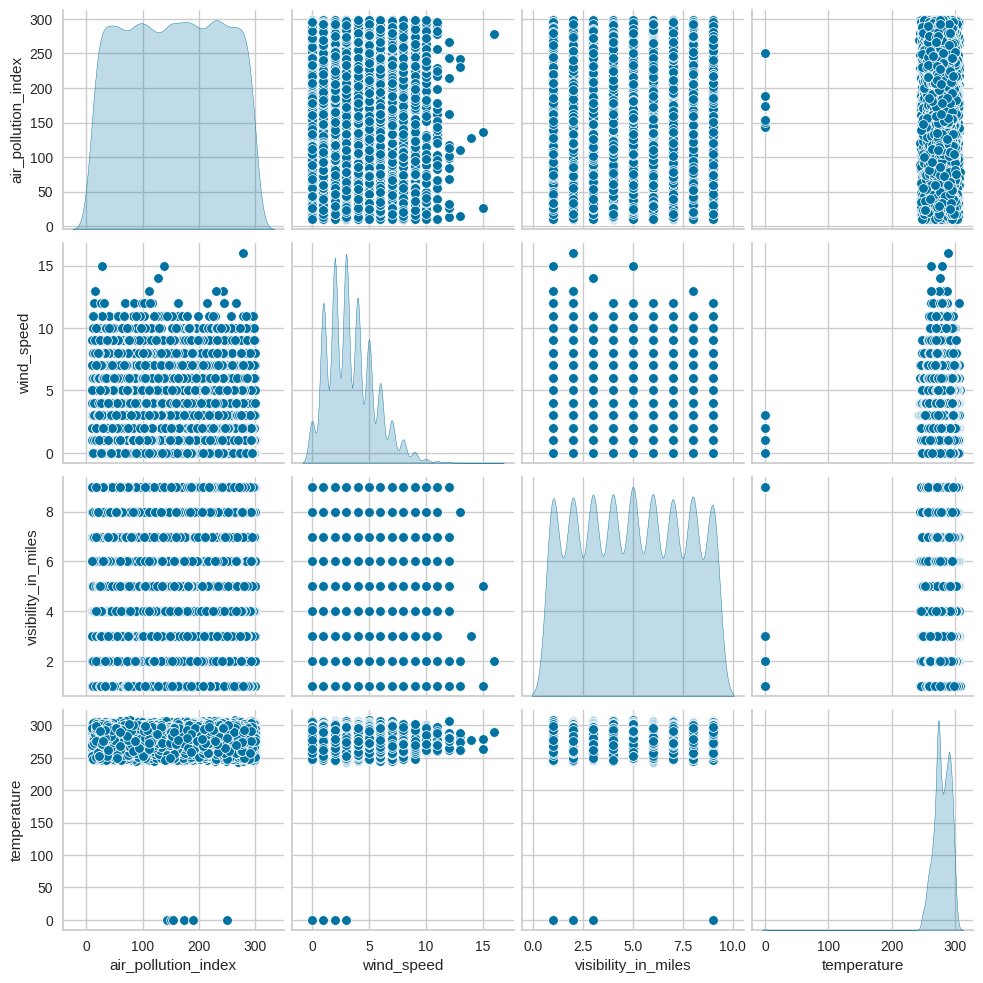

In [ ]:
sns.pairplot(train_dataset[["air_pollution_index", "wind_speed", "visibility_in_miles", "temperature"]], diag_kind="kde")

In [ ]:
#Overall stats

In [ ]:
train_stats = train_dataset.describe()
train_stats.pop("air_pollution_index")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
humidity,21600.0,71.206065,16.820849,13.000000,60.000000,72.000000,85.000000,100.00
wind_speed,21600.0,3.381111,2.054995,0.000000,2.000000,3.000000,5.000000,16.00
wind_direction,21600.0,199.606759,99.636079,0.000000,130.000000,200.000000,290.000000,360.00
visibility_in_miles,21600.0,4.981991,2.567970,1.000000,3.000000,5.000000,7.000000,9.00
dew_point,21600.0,4.981991,2.567970,1.000000,3.000000,5.000000,7.000000,9.00
temperature,21600.0,280.101949,13.374242,0.000000,271.750000,280.150000,290.672500,308.24
rain_p_h,21600.0,0.161704,1.211869,0.000000,0.000000,0.000000,0.000000,55.63
snow_p_h,21600.0,0.000331,0.010059,0.000000,0.000000,0.000000,0.000000,0.51
clouds_all,21600.0,50.175046,38.863486,0.000000,1.000000,64.000000,90.000000,100.00
traffic_volume,21600.0,3239.919861,1987.976469,0.000000,1166.000000,3353.500000,4912.000000,7241.00


In [ ]:
# Split data target variable from train data

In [ ]:
train_labels = train_dataset.pop('air_pollution_index')

In [ ]:
test_labels = test_dataset.pop('air_pollution_index')

In [ ]:
# Normalize Data. Feed the normalized data in the model

In [ ]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

In [ ]:
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [ ]:
#The Model

In [ ]:
def build_model():
  model = keras.Sequential([layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
                            layers.Dense(64, activation='relu'),
                            layers.Dense(1)])

  # Defining the optimizer with a specific learning rate of 0.001
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

 # Compiling the model
  model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()

In [ ]:
# Inspect the model

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                832       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,057
Trainable params: 5,057
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Now let's try out the model.Taking a batch of 10 examples from the training data and calling model.predict on it.#

In [ ]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

1/1 [==============================] - 0s 218ms/step


array([[-0.42591816],
       [-0.2424335 ],
       [ 0.2823621 ],
       [ 0.00981519],
       [ 0.33972633],
       [ 0.2503178 ],
       [-0.28207308],
       [-0.33161205],
       [-0.5400779 ],
       [-0.16998152]], dtype=float32)

In [ ]:
#Train the model

In [ ]:
EPOCHS = 1000

In [ ]:
history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, validation_split=0.2,
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:13040.6172,  mae:92.9963,  mse:13040.6172,  val_loss:7973.9424,  val_mae:74.8958,  val_mse:7973.9424,  
....................................................................................................
Epoch: 100, loss:6825.9165,  mae:71.2198,  mse:6825.9165,  val_loss:7265.9502,  val_mae:73.3616,  val_mse:7265.9502,  
....................................................................................................
Epoch: 200, loss:6623.2842,  mae:69.8718,  mse:6623.2842,  val_loss:7420.6079,  val_mae:73.8526,  val_mse:7420.6079,  
....................................................................................................
Epoch: 300, loss:6458.9307,  mae:68.7427,  mse:6458.9307,  val_loss:7583.6382,  val_mae:74.3523,  val_mse:7583.6382,  
....................................................................................................
Epoch: 400, loss:6328.1323,  mae:67.9048,  mse:6328.1323,  val_loss:7733.9180,  val_mae:74.7881,  val_mse:7733.9180,  


In [ ]:
# Visualizing the model's training progress using the stats stored in the history object.

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,6086.776367,65.894585,6086.776367,8084.677734,75.951035,8084.677734,995
996,6069.821777,65.798820,6069.821777,8116.910156,76.214584,8116.910156,996
997,6075.596191,65.849815,6075.596191,8142.217773,76.364609,8142.217773,997
998,6076.334473,65.816055,6076.334473,8086.548340,76.027405,8086.548340,998
999,6083.441895,65.802696,6083.441895,8118.909180,76.060570,8118.909180,999


In [ ]:
# We are using tfdocs.plots.HistoryPlotter() to plot our model history.

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [air_pollution_index]')

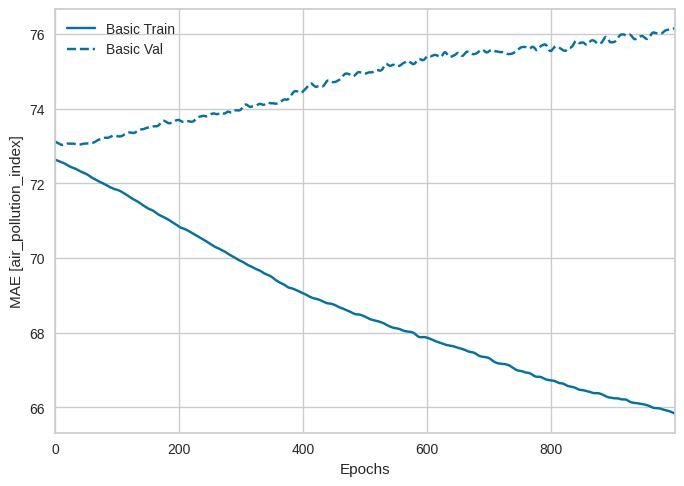

In [ ]:
plotter.plot({'Basic': history}, metric="mae")
plt.ylabel('MAE [air_pollution_index]')

In [ ]:
# This graph , or even degradation in the validation error , and high variance. Let's update the model.fit call to automatically stop training when the validation score doesn't improve.

# We'll use an EarlyStopping callback that tests a training condition for every epoch.If a set amount of epochs elapses without showing improvement, then automatically stop the training.

In [ ]:
model = build_model()

In [ ]:
# The patience parameter is the amount of epochs to check for improvement( Use this model for test data)
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
early_history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, validation_split=0.2,
                          verbose=0, callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:12849.7832,  mae:92.4800,  mse:12849.7832,  val_loss:7909.2769,  val_mae:74.7918,  val_mse:7909.2769,  
...........................

In [ ]:
early_hist = pd.DataFrame(early_history.history)
early_hist['epoch'] = early_history.epoch
early_hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
22,7014.566895,72.446175,7014.566895,7142.759766,72.952324,7142.759766,22
23,7013.030273,72.479622,7013.030273,7147.642578,72.989922,7147.642578,23
24,7003.443848,72.406296,7003.443848,7139.197266,72.956329,7139.197266,24
25,7008.350586,72.433830,7008.350586,7142.708496,72.997681,7142.708496,25
26,7004.375977,72.432320,7004.375977,7142.379395,72.956657,7142.379395,26


Text(0, 0.5, 'MAE [air_pollution_index]')

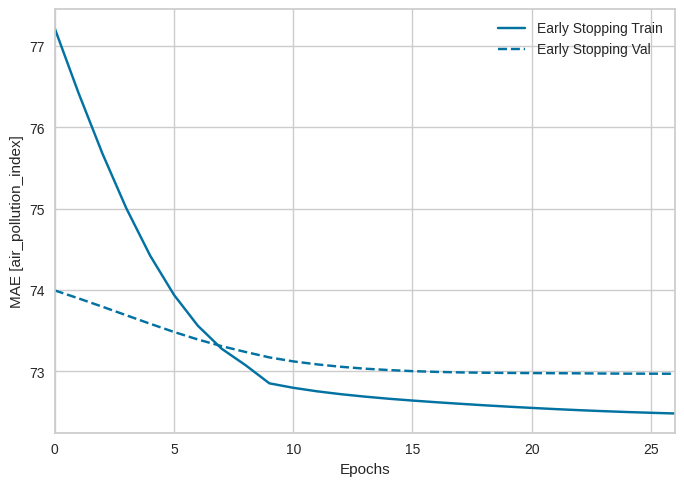

In [ ]:
plotter.plot({'Early Stopping': early_history}, metric="mae")
plt.ylabel('MAE [air_pollution_index]')

The graph shows that on the validation set, the average error is usually around 72


Let's see how well the model generalizes by using the test set, which we did not use when training the model.

This tells us how well we can expect the model to predict when we use it in the real world.

In [ ]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} air_pollution_index".format(mae))

169/169 - 0s - loss: 18355.0215 - mae: 74.3499 - mse: 18355.0215 - 491ms/epoch - 3ms/step
Testing set Mean Abs Error: 74.35 air_pollution_index


In [ ]:
# We can use this model for test data . But first clean the test data

In [ ]:
# Load test data
air_test = pd.read_csv('/content/air_test.csv')
print('Data Shape:', air_test.shape)
air_test.head()

Data Shape: (6750, 14)


,id,date_time,is_holiday,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,traffic_volume
0,8419,8/14/2013 22:00,None,76,2,140,6,6,287.82,0.0,0.0,0,Clear,2014
1,21188,2/9/2016 14:00,None,74,4,170,8,8,264.28,0.0,0.0,1,Clear,5384
2,15443,7/12/2014 11:00,None,52,7,308,8,8,296.57,0.0,0.0,92,Drizzle,4144
3,5952,5/11/2013 21:00,None,94,3,145,6,6,288.93,0.0,0.0,1,Clear,2147
4,28213,11/18/2016 18:00,None,77,3,355,9,9,273.59,0.0,0.0,90,Snow,3486


In [ ]:
air_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6750 entries, 0 to 6749
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   6750 non-null   int64  
 1   date_time            6750 non-null   object 
 2   is_holiday           6750 non-null   object 
 3   humidity             6750 non-null   int64  
 4   wind_speed           6750 non-null   int64  
 5   wind_direction       6750 non-null   int64  
 6   visibility_in_miles  6750 non-null   int64  
 7   dew_point            6750 non-null   int64  
 8   temperature          6750 non-null   float64
 9   rain_p_h             6750 non-null   float64
 10  snow_p_h             6750 non-null   float64
 11  clouds_all           6750 non-null   int64  
 12  weather_type         6750 non-null   object 
 13  traffic_volume       6750 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 738.4+ KB


In [ ]:
# drop unwanted variables
air_test.drop(['id','is_holiday'], axis=1,inplace=True)

In [ ]:
# convert the 'Date' column to datetime format
air_test['date_time']= pd.to_datetime(air_test['date_time'])

In [ ]:
# Use Datetime.strftime() Method to extract year
air_test["sample_year"] = air_test["date_time"].dt.year

In [ ]:
# Use Datetime.strftime() Method to extract year
air_test["sample_year"] = air_test["date_time"].dt.year

In [ ]:
# Age of the sample
air_test['Sample_Age'] = 2023 - air_test['sample_year']

In [ ]:
# drop Date_time & sample year field
air_test.drop(['date_time','sample_year'], axis=1,inplace=True)

In [ ]:
# Apply Kfolding on categorical data

In [ ]:
class KFoldTargetEncoderTest(base.BaseEstimator, base.TransformerMixin):

    def __init__(self,train,colNames,encodedName):

        self.train = train
        self.colNames = colNames
        self.encodedName = encodedName


    def fit(self, X, y=None):
        return self

    def transform(self,X):


        mean = self.train[[self.colNames,self.encodedName]].groupby(self.colNames).mean().reset_index()

        dd = {}
        for index, row in mean.iterrows():
            dd[row[self.colNames]] = row[self.encodedName]


        X[self.encodedName] = X[self.colNames]
        X = X.replace({self.encodedName: dd})

        return X

In [ ]:
test_targetc = KFoldTargetEncoderTest(air_train,'weather_type','weather_type_Kfold_Target_Enc')
air_test = test_targetc.fit_transform(air_test)

In [ ]:
air_test.drop(['weather_type'], axis=1,inplace=True)

In [ ]:
air_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6750 entries, 0 to 6749
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   humidity                       6750 non-null   int64  
 1   wind_speed                     6750 non-null   int64  
 2   wind_direction                 6750 non-null   int64  
 3   visibility_in_miles            6750 non-null   int64  
 4   dew_point                      6750 non-null   int64  
 5   temperature                    6750 non-null   float64
 6   rain_p_h                       6750 non-null   float64
 7   snow_p_h                       6750 non-null   float64
 8   clouds_all                     6750 non-null   int64  
 9   traffic_volume                 6750 non-null   int64  
 10  Sample_Age                     6750 non-null   int64  
 11  weather_type_Kfold_Target_Enc  6750 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 632.9 KB


In [ ]:
# Applying Model to test data

In [ ]:
air_test['air_pollution_index'] = model.predict(air_test)

211/211 [==============================] - 0s 2ms/step


In [ ]:
air_test.head()

,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,traffic_volume,Sample_Age,weather_type_Kfold_Target_Enc,air_pollution_index
0,76,2,140,6,6,287.82,0.0,0.0,0,2014,10,155.457892,37936.210938
1,74,4,170,8,8,264.28,0.0,0.0,1,5384,7,155.457892,100467.570312
2,52,7,308,8,8,296.57,0.0,0.0,92,4144,9,152.570489,76673.023438
3,94,3,145,6,6,288.93,0.0,0.0,1,2147,10,155.457892,40406.976562
4,77,3,355,9,9,273.59,0.0,0.0,90,3486,7,156.054812,64298.628906


In [ ]:
# since we need to use RMSE , find sqaure root of the target variable

In [ ]:
air_test['air_pollution_index_root']=np.sqrt((air_test['air_pollution_index']))

In [ ]:
air_test.head()

,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,traffic_volume,Sample_Age,weather_type_Kfold_Target_Enc,air_pollution_index,air_pollution_index_root
0,76,2,140,6,6,287.82,0.0,0.0,0,2014,10,155.457892,37936.210938,194.772202
1,74,4,170,8,8,264.28,0.0,0.0,1,5384,7,155.457892,100467.570312,316.966187
2,52,7,308,8,8,296.57,0.0,0.0,92,4144,9,152.570489,76673.023438,276.898926
3,94,3,145,6,6,288.93,0.0,0.0,1,2147,10,155.457892,40406.976562,201.014862
4,77,3,355,9,9,273.59,0.0,0.0,90,3486,7,156.054812,64298.628906,253.571747


In [ ]:
# Merge ID & index features from Test Data
final_a = air_test['air_pollution_index_root']

In [ ]:
# Load test data
air_test_c = pd.read_csv('/content/air_test.csv')
print('Data Shape:', air_test_c.shape)
air_test_c.head()

Data Shape: (6750, 14)


,id,date_time,is_holiday,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,traffic_volume
0,8419,8/14/2013 22:00,None,76,2,140,6,6,287.82,0.0,0.0,0,Clear,2014
1,21188,2/9/2016 14:00,None,74,4,170,8,8,264.28,0.0,0.0,1,Clear,5384
2,15443,7/12/2014 11:00,None,52,7,308,8,8,296.57,0.0,0.0,92,Drizzle,4144
3,5952,5/11/2013 21:00,None,94,3,145,6,6,288.93,0.0,0.0,1,Clear,2147
4,28213,11/18/2016 18:00,None,77,3,355,9,9,273.59,0.0,0.0,90,Snow,3486


In [ ]:
# Filter only ID variable
final_b = air_test_c['id']

In [ ]:
final_submission = pd.concat([final_b,final_a], axis=1, join='inner')

In [ ]:
final_submission.head()

,id,air_pollution_index_root
0,8419,194.772202
1,21188,316.966187
2,15443,276.898926
3,5952,201.014862
4,28213,253.571747


In [ ]:
# Exporting Data for Final Submission
final_submission.to_csv('Air_Pollution_Index.csv', index=False, header=False)

Make Predictions¶
Finally, predict index values using data in the testing set:

In [ ]:
test_predictions = model.predict(normed_test_data).flatten()

169/169 [==============================] - 0s 2ms/step


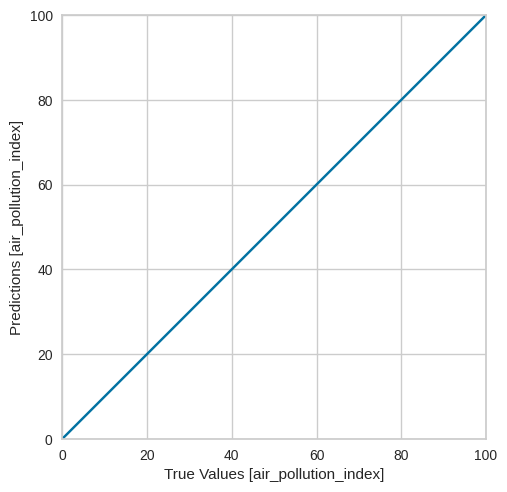

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [air_pollution_index]')
plt.ylabel('Predictions [air_pollution_index]')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
# Error distribution

In [ ]:
error = test_predictions - test_labels

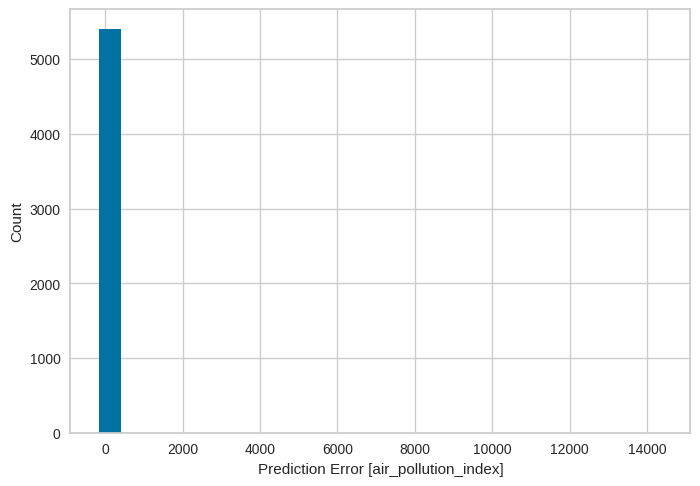

In [ ]:
plt.hist(error, bins=25)
plt.xlabel("Prediction Error [air_pollution_index]")
_ = plt.ylabel("Count")

.1 Increasing the Number of Hidden Layers and Hidden Units

In [ ]:
model = keras.Sequential([layers.Dense(256, activation='relu', input_shape=[len(train_dataset.keys())]),
                          layers.Dense(256, activation='relu'),
                          layers.Dense(256, activation='relu'),
                          layers.Dense(256, activation='relu'),
                          layers.Dense(1)])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 256)               3328      
                                                                 
 dense_22 (Dense)            (None, 256)               65792     
                                                                 
 dense_23 (Dense)            (None, 256)               65792     
                                                                 
 dense_24 (Dense)            (None, 256)               65792     
                                                                 
 dense_25 (Dense)            (None, 1)                 257       
                                                                 
Total params: 200,961
Trainable params: 200,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compiling the model
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

In [ ]:
history_large = model.fit(normed_train_data, train_labels, epochs=100, validation_split=0.2,
                          verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:8608.7979,  mae:77.6428,  mse:8608.7979,  val_loss:7414.9951,  val_mae:73.8830,  val_mse:7414.9951,  
....................................................................................................

Second decent mae for train -test

In [ ]:
hist_large = pd.DataFrame(history_large.history)
hist_large['epoch'] = history_large.epoch
hist_large.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
95,3170.684814,44.572315,3170.684814,10951.386719,86.198593,10951.386719,95
96,3113.962646,44.104652,3113.962646,11216.415039,87.005974,11216.415039,96
97,3039.036621,43.282959,3039.036621,11106.515625,86.694267,11106.515625,97
98,2986.798584,43.100147,2986.798584,11006.254883,86.265083,11006.254883,98
99,2885.509033,42.277988,2885.509033,11005.153320,86.027702,11005.153320,99


Text(0, 0.5, 'MAE [air_pollution_index]')

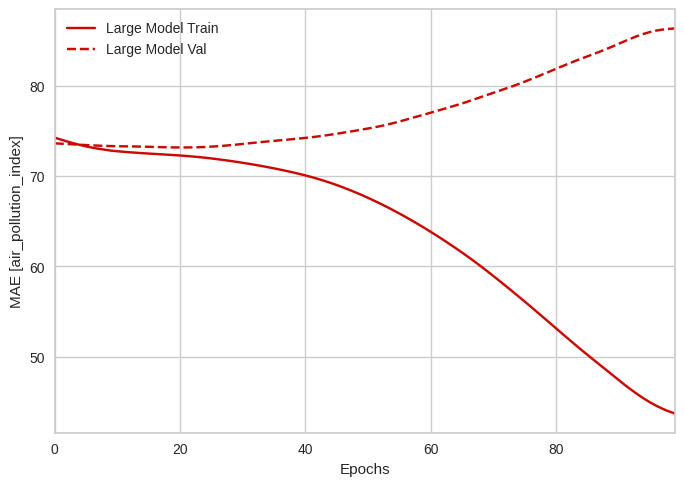

In [ ]:
plotter.plot({'Large Model': history_large}, metric="mae")

plt.ylabel('MAE [air_pollution_index]')

In [ ]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} air_pollution_index".format(mae))

169/169 - 1s - loss: 38057.1094 - mae: 86.2740 - mse: 38057.1094 - 611ms/epoch - 4ms/step
Testing set Mean Abs Error: 86.27 air_pollution_index


In [ ]:
# above model overfits hence regularize weights

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
model = keras.Sequential([layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=[len(train_dataset.keys())]),
                          layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
                          layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
                          layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
                          layers.Dense(1)])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               3328      
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 dense_10 (Dense)            (None, 1)                 257       
                                                                 
Total params: 200,961
Trainable params: 200,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compiling the model
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

In [ ]:
history_l2 = model.fit(normed_train_data, train_labels, epochs=100, validation_split=0.2,
                          verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:8621.4062,  mae:77.4821,  mse:8620.5957,  val_loss:7392.9619,  val_mae:73.7265,  val_mse:7392.1821,  
....................................................................................................

Decent difference in train - test mae

In [ ]:
hist_l2 = pd.DataFrame(history_l2.history)
hist_l2['epoch'] = history_l2.epoch
hist_l2.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
95,4304.800293,53.318703,4298.804688,9790.844727,82.106667,9784.777344,95
96,4241.629395,53.015736,4235.471191,9722.562500,82.000801,9716.332031,96
97,4195.716797,52.636612,4189.396484,9690.319336,82.029678,9683.924805,97
98,4145.652344,52.122719,4139.171875,9924.835938,82.811592,9918.291992,98
99,4110.437012,51.973118,4103.806152,9776.554688,82.300514,9769.847656,99


Text(0, 0.5, 'MAE [index]')

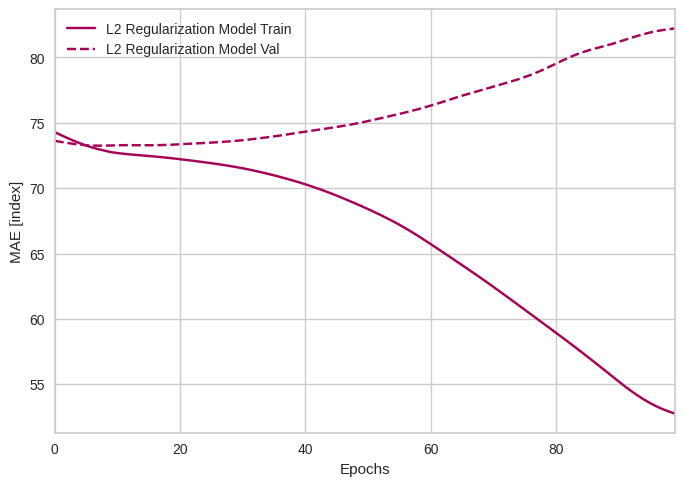

In [ ]:
plotter.plot({'L2 Regularization Model': history_l2}, metric="mae")
plt.ylabel('MAE [index]')

In [ ]:
# Still high variance.

In [ ]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} index".format(mae))

169/169 - 1s - loss: 35815.8242 - mae: 84.5326 - mse: 35809.1133 - 544ms/epoch - 3ms/step
Testing set Mean Abs Error: 84.53 index


In [ ]:
# Dropout

In [ ]:
model = keras.Sequential([layers.Dense(256, activation='relu', input_shape=[len(train_dataset.keys())]),
                          layers.Dropout(0.2),
                          layers.Dense(256, activation='relu'),
                          layers.Dropout(0.2),
                          layers.Dense(256, activation='relu'),
                          layers.Dropout(0.2),
                          layers.Dense(256, activation='relu'),
                          layers.Dropout(0.2),
                          layers.Dense(1)])

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 256)               3328      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_32 (Dense)            (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_33 (Dense)            (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_34 (Dense)            (None, 256)              

In [ ]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compiling the model
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

In [ ]:
history_dropout = model.fit(normed_train_data, train_labels, epochs=100, validation_split=0.2,
                          verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:8928.8438,  mae:78.2087,  mse:8928.8438,  val_loss:7555.9155,  val_mae:73.8844,  val_mse:7555.9155,  
....................................................................................................

In [ ]:
hist_dropout = pd.DataFrame(history_dropout.history)
hist_dropout['epoch'] = history_dropout.epoch
hist_dropout.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
95,6134.017578,65.999229,6134.017578,7698.330566,74.871506,7698.330566,95
96,6111.661621,65.868317,6111.661621,7760.753906,75.200676,7760.753906,96
97,6123.520508,66.045288,6123.520508,7720.653809,74.864151,7720.653809,97
98,6118.729980,65.889091,6118.729980,7828.379395,75.401451,7828.379395,98
99,6112.674805,65.871658,6112.674805,7768.866699,75.046318,7768.866699,99


Text(0, 0.5, 'MAE [index]')

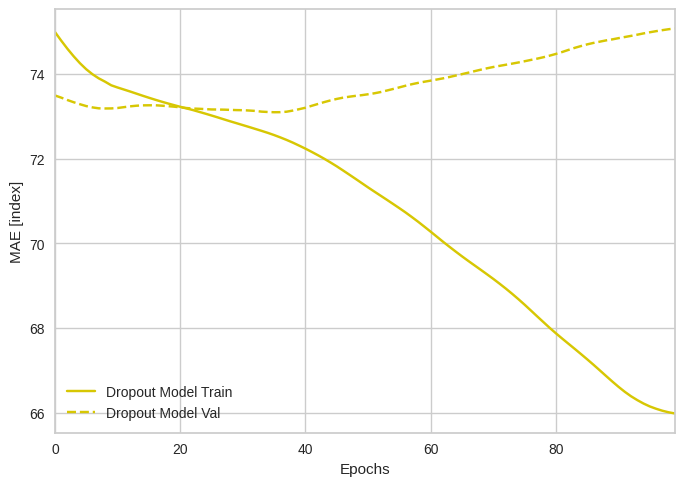

In [ ]:
plotter.plot({'Dropout Model': history_dropout}, metric="mae")
plt.ylabel('MAE [index]')

In [ ]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

169/169 - 1s - loss: 18014.9844 - mae: 76.0741 - mse: 18014.9844 - 786ms/epoch - 5ms/step
Testing set Mean Abs Error: 76.07 MPG


In [ ]:
# Batch Normalization

In [ ]:
model = keras.Sequential([layers.Dense(256, input_shape=[len(train_dataset.keys())]),
                          layers.BatchNormalization(),
                          layers.ReLU(),
                          layers.Dense(256),
                          layers.BatchNormalization(),
                          layers.ReLU(),
                          layers.Dense(256),
                          layers.BatchNormalization(),
                          layers.ReLU(),
                          layers.Dense(256),
                          layers.BatchNormalization(),
                          layers.ReLU(),
                          layers.Dense(1)])

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 256)               3328      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 256)               0         
                                                                 
 dense_37 (Dense)            (None, 256)               65792     
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 re_lu_1 (ReLU)              (None, 256)             

In [ ]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compiling the model
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

In [ ]:
history_batch_norm = model.fit(normed_train_data, train_labels, epochs=100, validation_split=0.2,
                          verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:18180.1895,  mae:110.9493,  mse:18180.1895,  val_loss:8370.9922,  val_mae:77.4030,  val_mse:8370.9922,  
....................................................................................................

In [ ]:
hist_batch_norm = pd.DataFrame(history_batch_norm.history)
hist_batch_norm['epoch'] = history_batch_norm.epoch
hist_batch_norm.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
95,5997.529785,65.568733,5997.529785,8009.227051,76.101776,8009.227051,95
96,6021.200684,65.751656,6021.200684,8030.195312,76.300537,8030.195312,96
97,5968.592773,65.187378,5968.592773,8096.918457,76.517120,8096.918457,97
98,6069.645996,65.914917,6069.645996,8019.517578,76.226646,8019.517578,98
99,6019.308594,65.656006,6019.308594,8111.012207,76.799774,8111.012207,99


Text(0, 0.5, 'MAE [index]')

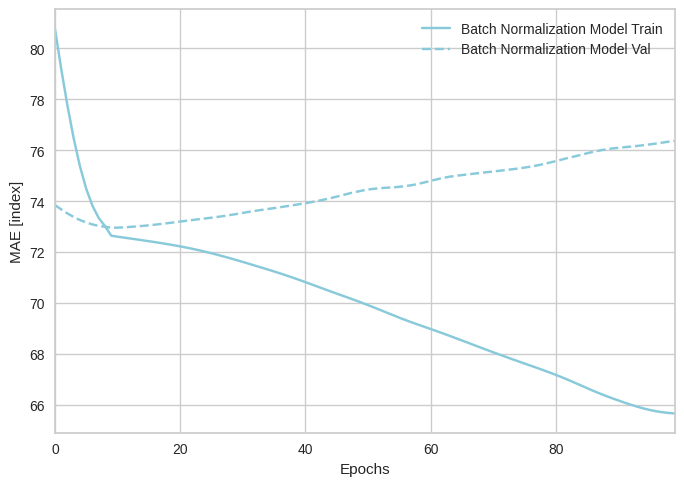

In [ ]:
plotter.plot({'Batch Normalization Model': history_batch_norm}, metric="mae")
plt.ylabel('MAE [index]')

In [ ]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

169/169 - 1s - loss: 10702.4189 - mae: 75.7972 - mse: 10702.4189 - 674ms/epoch - 4ms/step
Testing set Mean Abs Error: 75.80 MPG
